# Topological Sort

### fig 22.7 a
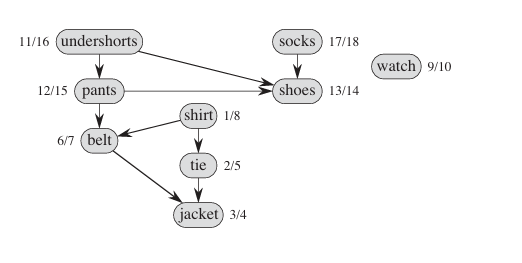

In [21]:
from collections import defaultdict

def topological(graph):
    visit = set()
    stack = []
    
    def dfs(node):
        visit.add(node)
        for i in graph[node]:
            if i not in visit:
                dfs(i)
        stack.append(node)  
    
    for node in graph:
        if node not in visit:
            dfs(node)
    
    stack.reverse()  
    return stack

graph = {
    "undershorts": ["pants", "shoes"],
    "pants": ["shoes", "belt"],
    "belt": ["jacket"],
    "shirt": ["tie", "belt"],
    "tie": ["jacket"],
    "jacket": [],
    "socks": ["shoes"],
    "shoes": [],
    "watch": [],
    
}
    
print("Result:", topological(graph))



Result: ['watch', 'socks', 'shirt', 'tie', 'undershorts', 'pants', 'belt', 'jacket', 'shoes']


# DFS

### fig 22.4
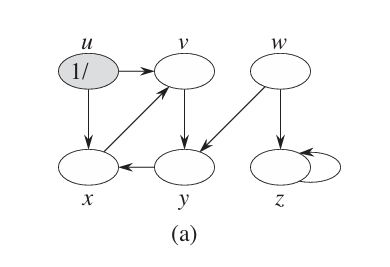

In [22]:
def dfs(graph, node, visited=None):
    if visited is None:
        visited = set()
    visited.add(node)
    for i in graph[node]:
        if i not in visited:
            dfs(graph, i, visited)
    return visited


exp = {
        'u': ['v', 'x'],
        'v': ['y'],
        'x': ['v'],
        'y': ['x'],
        'w': ['y', 'z'],
        'z': ['z']
}
nodesVisit = dfs(exp, 'u')
print("Visited nodes:", nodesVisit)


Visited nodes: {'u', 'v', 'x', 'y'}


# Kruskal algorithm

### fig 23.4
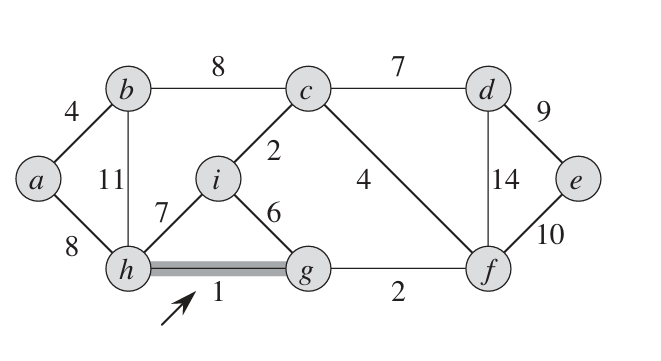

In [23]:
class DjSet:
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}
        self.rank = {node: 0 for node in nodes} #initializing rank = 0

    def find(self, node):
        if self.parent[node] != node:
            self.parent[node] = self.find(self.parent[node])
        return self.parent[node]

    def union(self, node1, node2):
        root_a = self.find(node1)
        root_b = self.find(node2)

        if root_a != root_b:
            if self.rank[root_a] > self.rank[root_b]:
                self.parent[root_b] = root_a
            elif self.rank[root_a] < self.rank[root_b]:
                self.parent[root_a] = root_b
            else:
                self.parent[root_b] = root_a
                self.rank[root_a] += 1

# weight of the edge
def get_weight(edge):
    return edge[2]

def kruskal_algo(nodes, given_edges):
    ds = DjSet(nodes)
    res = []  

    given_edges.sort(key=get_weight) #sorting by weights

    for node1, node2, weight in given_edges:
        if ds.find(node1) != ds.find(node2):
            res.append((node1, node2, weight))
            ds.union(node1, node2)  
    return res

#Example:
numOfNodes = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
given_edges = [
    ("a", "b", 4),
    ("a", "h", 8),
    ("b", "c", 8),
    ("b", "h", 11),
    ("c", "i", 2),
    ("c", "f", 4),
    ("c", "d", 7),
    ("d", "e", 9),
    ("d", "f", 14),
    ("e", "f", 10),
    ("f", "g", 2),
    ("g", "i", 6),
    ("g", "h", 1),
    ("h", "i", 7)
]

final_res = kruskal_algo(numOfNodes, given_edges)
    
print("Edges in MST:")
for i in final_res:
    print(i)


Edges in MST:
('g', 'h', 1)
('c', 'i', 2)
('f', 'g', 2)
('a', 'b', 4)
('c', 'f', 4)
('c', 'd', 7)
('a', 'h', 8)
('d', 'e', 9)
